# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install salib
from SALib.sample import saltelli
from SALib.analyze import sobol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.7/778.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00


In [ ]:
# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

# Creating Model

In [ ]:
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler

featureNames = np.array(['Feature 1', 'Feature 2', 'Feature 3'])

# Initialiases the data

# Gives example data
from sklearn.datasets import make_regression
data = make_regression(n_features=3, n_samples=1000)
xData, yData = data
xData = xData.T
# xData = np.array([[-1, -1, 2], [-2, -1, 4], [-3, -2, 1], [1, 1, 3], [2, 1, -2], [3, 2, -4]])
# yData = np.array([98, 173, 279, 422, 588, 716]).reshape(-1, 1)

# Scales the data
# xScaler = StandardScaler().fit(xData)
# xData = xScaler.transform(xData)
# xData = xData.T

# yScaler = StandardScaler().fit(yData.reshape(-1, 1))
# yData = yScaler.transform(yData.reshape(-1, 1))[:,0]

In [ ]:
# Defines the linear function
def linear(xData, m1, m2, m3, c):
  return m1 * xData[0] + m2 * xData[1] + m3 * xData[2] + c

MODEL_TYPE = linear

In [ ]:
# Calculates the paramaters of the model
popt, pcov = curve_fit(MODEL_TYPE, xData, yData, maxfev = 10000)
coeffs, c = popt[:-1], popt[-1]

# Creates function for model with the found parameters
model = lambda xData: MODEL_TYPE(xData, *popt)
print(popt)

[3.55871166e+01 8.31681058e+00 1.90478895e+01 1.06753692e-08]


# Sensitivity Analysis

In [ ]:
# Defines parameters and bounds for the sensitivity analysis
problem = {
    'num_vars': len(featureNames),
    'names': featureNames,
    'bounds': [[np.min(xData[x]) * 0.9, np.max(xData[x]) * 1.1] for x in range(len(featureNames))]
}

# Creates a sample dataset to analyse the sensitivity on
paramValues = saltelli.sample(problem, 1024)


# Uses the model to produce predicted values for each of the samples
Y = np.zeros([paramValues.shape[0]])
for i, X in enumerate(paramValues):
    Y[i] = model(X)

sensitivity = sobol.analyze(problem, Y)

<ipython-input-9-0928bd4a3852>:8: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  paramValues = saltelli.sample(problem, 1024)


{'S1': array([0.69864624, 0.0419423 , 0.2594606 ]), 'S1_conf': array([0.05896938, 0.01882874, 0.04144882]), 'ST': array([0.69858627, 0.04198813, 0.25938872]), 'ST_conf': array([0.0528298 , 0.0036888 , 0.02051967]), 'S2': array([[            nan, -1.29687318e-04, -1.33663818e-04],
       [            nan,             nan,  7.79387410e-05],
       [            nan,             nan,             nan]]), 'S2_conf': array([[       nan, 0.08004985, 0.09080743],
       [       nan,        nan, 0.02887896],
       [       nan,        nan,        nan]])}


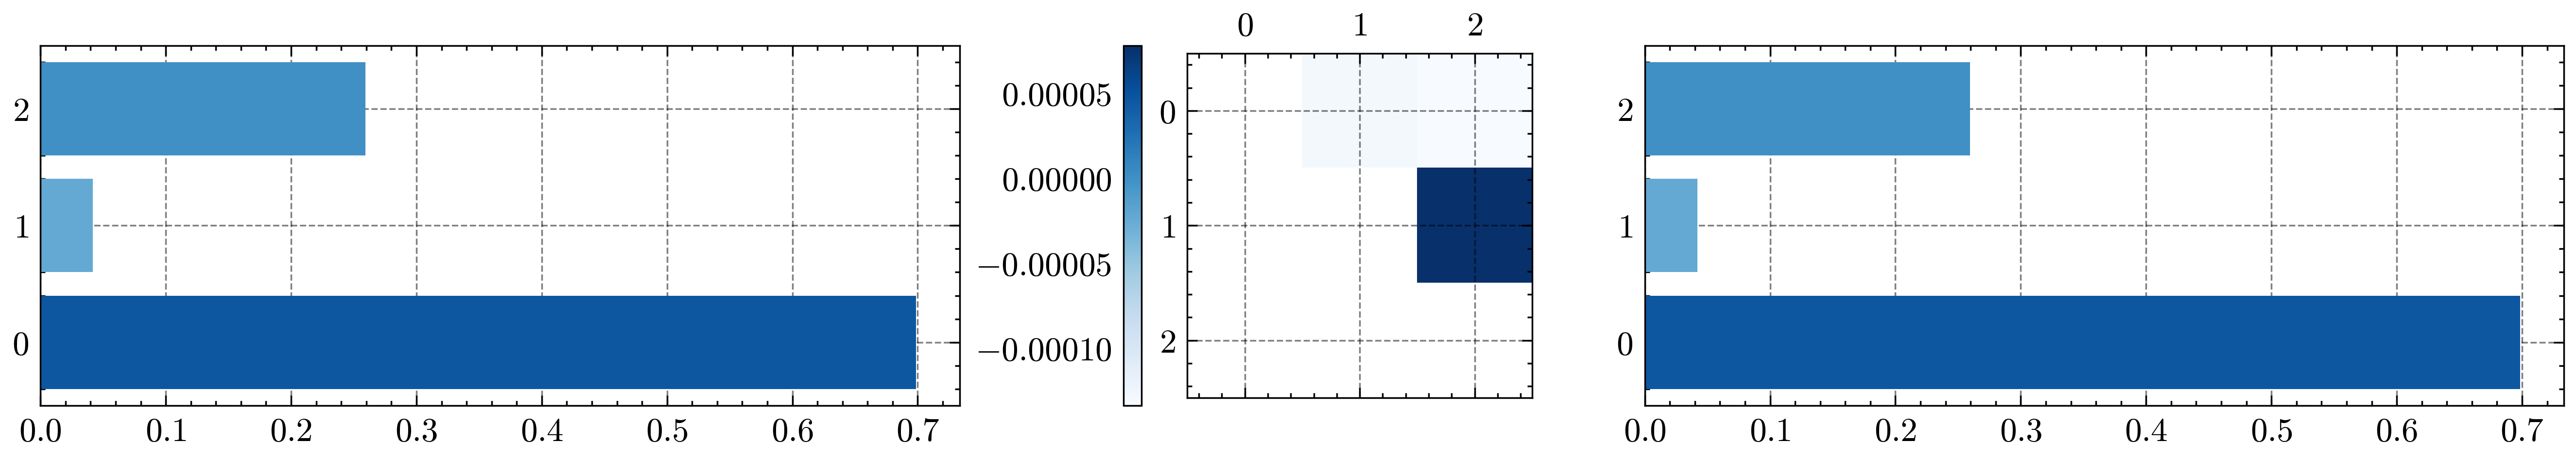

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11,2),
                         width_ratios=[2, 1, 2], dpi=500)
fig.tight_layout()

cMap = plt.get_cmap('Blues')

# Plots the grid for the second indicies
ms = axes[1].matshow(sensitivity['S2'], cmap=plt.cm.Blues)
fig.colorbar(ms, ax=axes[1], location='left')

# Plots the first order indicies
s1Sense = sensitivity['S1']

axes[0].barh(range(len(s1Sense)), s1Sense,
         color=cMap(s1Sense * 1 / 2 + 0.5))

# Plots the total order indicies
sTSense = sensitivity['ST']

axes[2].barh(range(len(sTSense)), sTSense,
         color=cMap(sTSense * 1 / 2 + 0.5))

plt.show()